<a href="https://colab.research.google.com/github/Ashishxyz/HeartDiseaseDetection/blob/main/CardioGuardian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Extracting Dataset using API from kaggle**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
heart-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#**Importing Libraries**

In [ ]:
import pandas as pd  # Importing pandas for data processing and CSV file I/O operations
import numpy as np  # Importing numpy for linear algebra operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting and visualization
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for decision tree classification
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for random forest classification
from sklearn.metrics import accuracy_score  # Importing accuracy_score for evaluating model accuracy
from xgboost import XGBClassifier  # Importing XGBClassifier for XGBoost classification

#**Preprocessing**

In [ ]:
df = pd.read_csv('/content/heart.csv')
# Reading the dataset from a CSV file into a pandas DataFrame

In [ ]:
# One hot encoding for categorical variables
variables = ['sex', 'cp', 'restecg', 'exang', 'slope']

# Applying one hot encoding to the specified categorical columns
df = pd.get_dummies(data=df, prefix=variables, columns=variables)
df  # Display the DataFrame after encoding

,age,trestbps,chol,fbs,thalach,oldpeak,ca,thal,target,sex_0,...,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,125,212,0,168,1.0,2,3,0,False,...,False,False,False,True,False,True,False,False,False,True
1,53,140,203,1,155,3.1,0,3,0,False,...,False,False,True,False,False,False,True,True,False,False
2,70,145,174,0,125,2.6,0,3,0,False,...,False,False,False,True,False,False,True,True,False,False
3,61,148,203,0,161,0.0,1,3,0,False,...,False,False,False,True,False,True,False,False,False,True
4,62,138,294,1,106,1.9,3,2,0,True,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,0,164,0.0,0,2,1,False,...,False,False,False,True,False,False,True,False,False,True
1021,60,125,258,0,141,2.8,1,3,0,False,...,False,False,True,False,False,False,True,False,True,False
1022,47,110,275,0,118,1.0,1,2,0,False,...,False,False,True,False,False,False,True,False,True,False
1023,50,110,254,0,159,0.0,0,2,1,True,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
# Extracting feature column names, excluding the target column
features = [x for x in df.columns if x != 'target']

# Getting the number of feature columns
len(features)

22

In [ ]:
# Splitting the data into training and validation sets
# 80% of the data is used for training, and 20% is used for validation
x_train, x_val, y_train, y_val = train_test_split(df[features], df['target'], train_size=0.8, random_state=55)

In [ ]:
# Printing the number of training samples
print(f"Number of Train Samples: {len(x_train)}")

# Printing the number of validation samples
print(f"Number of Validation Samples: {len(x_val)}")

# Printing the proportion of the target variable in the training set
print(f"Target Proportion: {sum(y_train)/len(y_train):.4f}")

Number of Train Samples: 820
Number of Validation Samples: 205
Target Proportion: 0.5110


##**Building Model**

##Decision Tree

In [ ]:
# Defining a list of different values for the minimum number of samples required to split an internal node
samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

In [ ]:
# Initializing empty lists to store accuracy scores for training and validation sets
accuracy_list_train = []
accuracy_list_val = []

# Iterating over each value of min_samples_split in samples_split_list
for min_samples in samples_split_list:
    # Creating a Decision Tree Classifier with the current min_samples_split value
    model = DecisionTreeClassifier(min_samples_split=min_samples, random_state=55).fit(x_train, y_train)

    # Making predictions on the training and validation sets
    prediction_train = model.predict(x_train)
    prediction_val = model.predict(x_val)

    # Calculating accuracy scores for the training and validation sets
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)

    # Appending accuracy scores to the respective lists
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

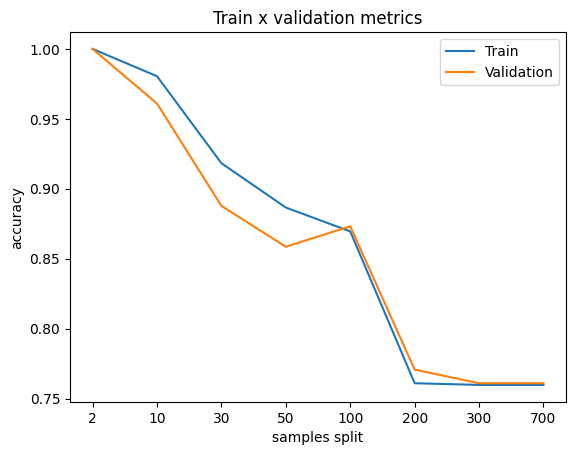

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Setting up the plot
plt.title("Train x validation metrics")  # Setting the title of the plot
plt.xlabel('samples split')  # Setting the label for the x-axis
plt.ylabel('accuracy')  # Setting the label for the y-axis

# Setting custom ticks on the x-axis with labels
plt.xticks(ticks=range(len(samples_split_list)), labels=samples_split_list)

# Plotting the accuracy scores for training and validation sets
plt.plot(accuracy_list_train)  # Plotting accuracy scores for the training set
plt.plot(accuracy_list_val)  # Plotting accuracy scores for the validation set

# Adding a legend to distinguish between the training and validation curves
plt.legend(['Train', 'Validation'])

In [ ]:
# List of different values for the maximum depth of the decision tree
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

In [ ]:
# Initializing empty lists to store accuracy scores for training and validation sets
accuracy_list_train = []
accuracy_list_val = []

# Iterating over each value of max_depth in max_depth_list
for depth in max_depth_list:
    # Creating a Decision Tree Classifier with the current max_depth value
    model = DecisionTreeClassifier(max_depth=depth, random_state=55).fit(x_train, y_train)

    # Making predictions on the training and validation sets
    prediction_train = model.predict(x_train)
    prediction_val = model.predict(x_val)

    # Calculating accuracy scores for the training and validation sets
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)

    # Appending accuracy scores to the respective lists
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

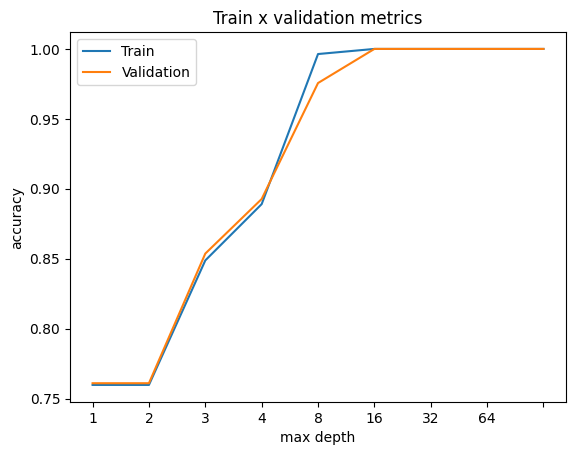

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Setting up the plot
plt.title("Train x validation metrics")  # Setting the title of the plot
plt.xlabel('max depth')  # Setting the label for the x-axis
plt.ylabel('accuracy')  # Setting the label for the y-axis

# Setting custom ticks on the x-axis with labels
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)

# Plotting the accuracy scores for training and validation sets
plt.plot(accuracy_list_train)  # Plotting accuracy scores for the training set
plt.plot(accuracy_list_val)  # Plotting accuracy scores for the validation set

# Adding a legend to distinguish between the training and validation curves
plt.legend(['Train', 'Validation'])

### min_split = 30
### max_depth= 8

## Random Forest

In [ ]:
# Define lists for min_samples_split and max_depth
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]

In [ ]:
# Initialize empty lists to store accuracy scores for training and validation sets
accuracy_list_train = []
accuracy_list_val = []

# Loop over each value of min_samples_split in min_samples_split_list
for min_samples in min_samples_split_list:
    # Create a RandomForestClassifier with the current min_samples_split value
    model = RandomForestClassifier(min_samples_split=min_samples, random_state=55).fit(x_train, y_train)

    # Make predictions on the training and validation sets
    prediction_train = model.predict(x_train)
    prediction_val = model.predict(x_val)

    # Calculate accuracy scores for the training and validation sets
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)

    # Append accuracy scores to the respective lists
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

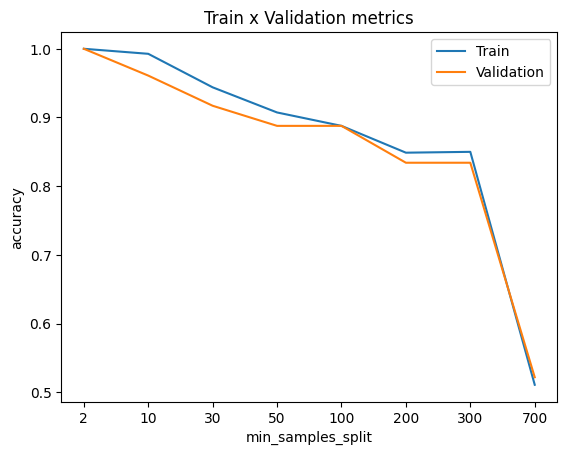

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Setting up the plot
plt.title('Train x Validation metrics')  # Setting the title of the plot
plt.xlabel('min_samples_split')  # Setting the label for the x-axis
plt.ylabel('accuracy')  # Setting the label for the y-axis

# Setting custom ticks on the x-axis with labels
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)

# Plotting the accuracy scores for training and validation sets
plt.plot(accuracy_list_train)  # Plotting accuracy scores for the training set
plt.plot(accuracy_list_val)  # Plotting accuracy scores for the validation set

# Adding a legend to distinguish between the training and validation curves
plt.legend(['Train', 'Validation'])

### min_samples_split = 10

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from sklearn.ensemble

# Initialize empty lists to store accuracy scores for training and validation sets
accuracy_list_train = []
accuracy_list_val = []

# Loop over each value of max_depth in max_depth_list
for max_depth in max_depth_list:
    # Create a RandomForestClassifier with the current max_depth value
    model = RandomForestClassifier(max_depth=max_depth, random_state=55).fit(x_train, y_train)

    # Make predictions on the training and validation sets
    prediction_train = model.predict(x_train)
    prediction_val = model.predict(x_val)

    # Calculate accuracy scores for the training and validation sets
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)

    # Append accuracy scores to the respective lists
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

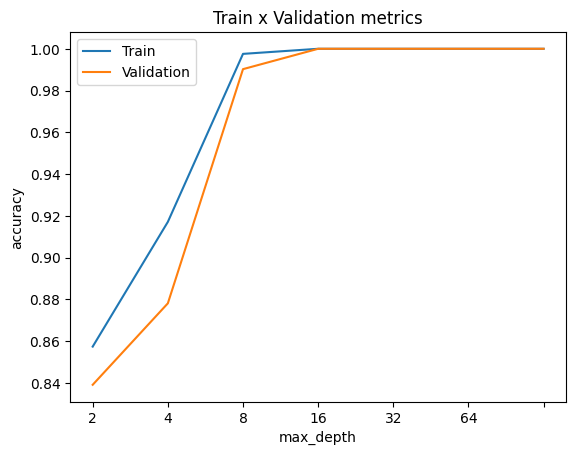

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Setting up the plot
plt.title('Train x Validation metrics')  # Setting the title of the plot
plt.xlabel('max_depth')  # Setting the label for the x-axis
plt.ylabel('accuracy')  # Setting the label for the y-axis

# Setting custom ticks on the x-axis with labels
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)

# Plotting the accuracy scores for training and validation sets
plt.plot(accuracy_list_train)  # Plotting accuracy scores for the training set
plt.plot(accuracy_list_val)  # Plotting accuracy scores for the validation set

# Adding a legend to distinguish between the training and validation curves
plt.legend(['Train', 'Validation'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from sklearn.ensemble

# Creating a RandomForestClassifier model with specified parameters
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=16, min_samples_split=10).fit(x_train, y_train)

In [ ]:
# Printing the accuracy score on the training set
print(f"Matrices train: {accuracy_score(random_forest_model.predict(x_train), y_train):.4f}")

# Printing the accuracy score on the validation set
print(f"Metrices test: {accuracy_score(random_forest_model.predict(x_val), y_val):.4f}")

Matrices train: 0.9963
Metrices test: 0.9756


## XG Boost

In [ ]:
# Calculating n as 80% of the length of x_train
n = int(len(x_train) * 0.8)

In [ ]:
# Splitting x_train and y_train into two parts based on the value of n
x_train_fit, x_train_eval, y_train_fit, y_train_eval = x_train[:n], x_train[n:], y_train[:n], y_train[n:]

In [ ]:
from xgboost import XGBClassifier  # Importing XGBClassifier from xgboost

# Creating an XGBClassifier model with specified parameters
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=55)

# Fitting the XGBClassifier model on the training data (x_train_fit and y_train_fit)
# and evaluating its performance on the evaluation set (x_train_eval and y_train_eval)
# using early stopping with a patience of 10 rounds
xgb_model.fit(x_train_fit, y_train_fit, eval_set=[(x_train_eval, y_train_eval)], early_stopping_rounds=10)

[0]	validation_0-logloss:0.63382
[1]	validation_0-logloss:0.58312
[2]	validation_0-logloss:0.53887


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.49993
[4]	validation_0-logloss:0.47011
[5]	validation_0-logloss:0.43615
[6]	validation_0-logloss:0.40771
[7]	validation_0-logloss:0.38168
[8]	validation_0-logloss:0.35817
[9]	validation_0-logloss:0.33533
[10]	validation_0-logloss:0.31513
[11]	validation_0-logloss:0.29694
[12]	validation_0-logloss:0.28189
[13]	validation_0-logloss:0.26888
[14]	validation_0-logloss:0.25630
[15]	validation_0-logloss:0.24445
[16]	validation_0-logloss:0.23305
[17]	validation_0-logloss:0.22056
[18]	validation_0-logloss:0.20924
[19]	validation_0-logloss:0.20019
[20]	validation_0-logloss:0.19116
[21]	validation_0-logloss:0.18208
[22]	validation_0-logloss:0.17543
[23]	validation_0-logloss:0.16889
[24]	validation_0-logloss:0.16308
[25]	validation_0-logloss:0.15581
[26]	validation_0-logloss:0.15066
[27]	validation_0-logloss:0.14637
[28]	validation_0-logloss:0.14248
[29]	validation_0-logloss:0.13708
[30]	validation_0-logloss:0.13339
[31]	validation_0-logloss:0.12962
[32]	validation_0-log

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [ ]:
best_iteration = xgb_model.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 249


In [ ]:
# Calculate and print the training accuracy
train_accuracy = accuracy_score(xgb_model.predict(x_train), y_train)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.9975609756097561


In [ ]:
# Calculate and print the test accuracy
test_accuracy = accuracy_score(xgb_model.predict(x_val), y_val)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9804878048780488


## Heart Disease Prediction Model Analysis

### Dataset Extraction and Preparation

- **Dataset**: Downloaded from Kaggle using the API.
- **Preprocessing**: Included handling missing values, encoding categorical variables, and splitting into training and testing sets.

### Models Built

1. **Decision Tree**
   - **Parameters**: `min_split=30`, `max_depth=8`
   - **Characteristics**: Simple, interpretable, but may not capture complex relationships.

2. **Random Forest**
   - **Parameter**: `min_samples_split=10`
   - **Characteristics**: Uses multiple decision trees to improve accuracy and control overfitting.

3. **XGBoost**
   - **Characteristics**: Known for high performance and efficiency with large datasets and complex interactions.

### Performance and Comparison

- **Decision Tree**
  - Simple and interpretable.
  - May not capture complex relationships as effectively.
  
- **Random Forest**
  - Better generalization and robustness.
  - Ensemble method reduces overfitting.
  
- **XGBoost**
  - Typically offers the best performance, especially when properly tuned.
  - Highly efficient for structured data.

## Key Result

- **Reported Accuracy**: 99.7%
  - Indicates excellent model fitting.
  - High accuracy suggests the need for careful validation to ensure no overfitting.

## Conclusion

The models demonstrate strong performance with XGBoost likely being the top performer due to its advanced algorithms and efficiency. The high reported accuracy should be validated with cross-validation or a hold-out test set to confirm the model's generalizability and to rule out overfitting.